# Logistic Regression

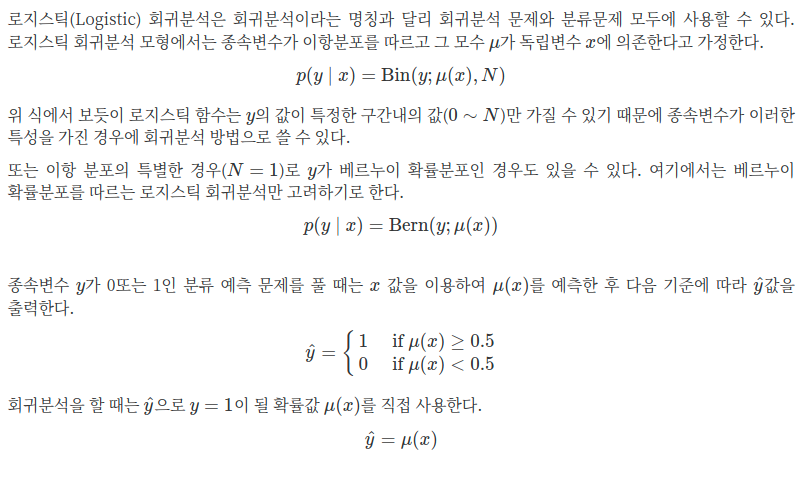

## Sigmoid function

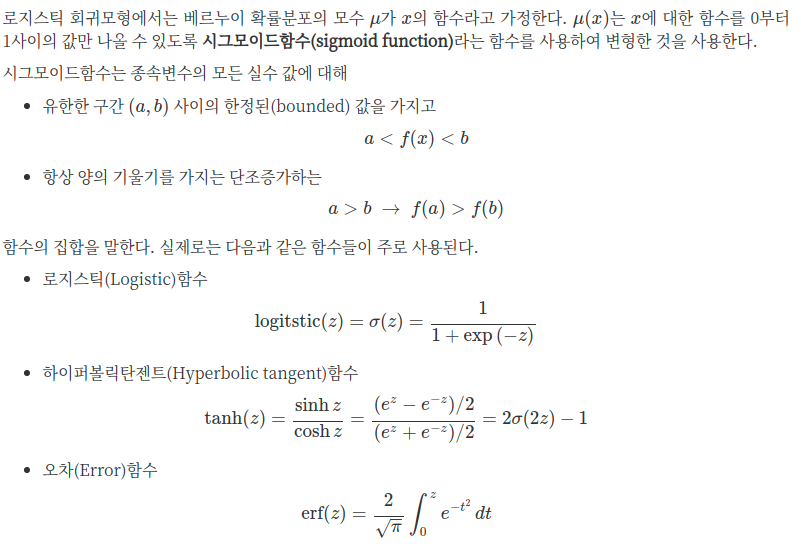

In [6]:
!pip3 install scipy==1.5.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 25.9 MB 8.7 MB/s eta 0:00:012
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.1 which is incompatible.
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

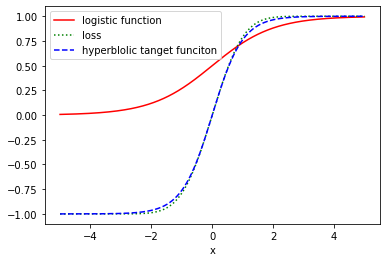

In [21]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic function")
plt.plot(xx, special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="loss")
plt.plot(xx, np.tanh(xx), 'b--', label="hyperblolic tanget funciton")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

## Logistic Function

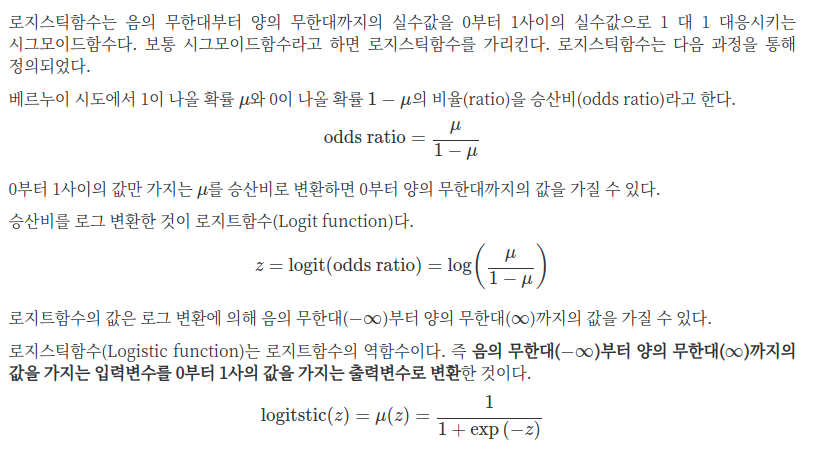

## 선형 팔변함수

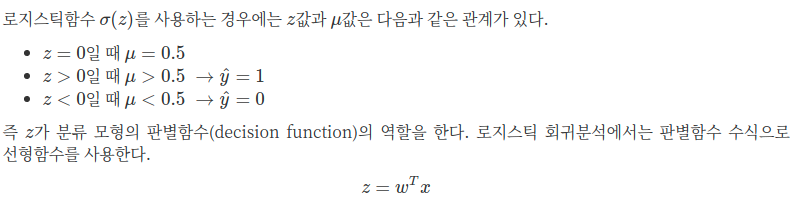

## 로지스틱 회구분석 모형의 모수 추정

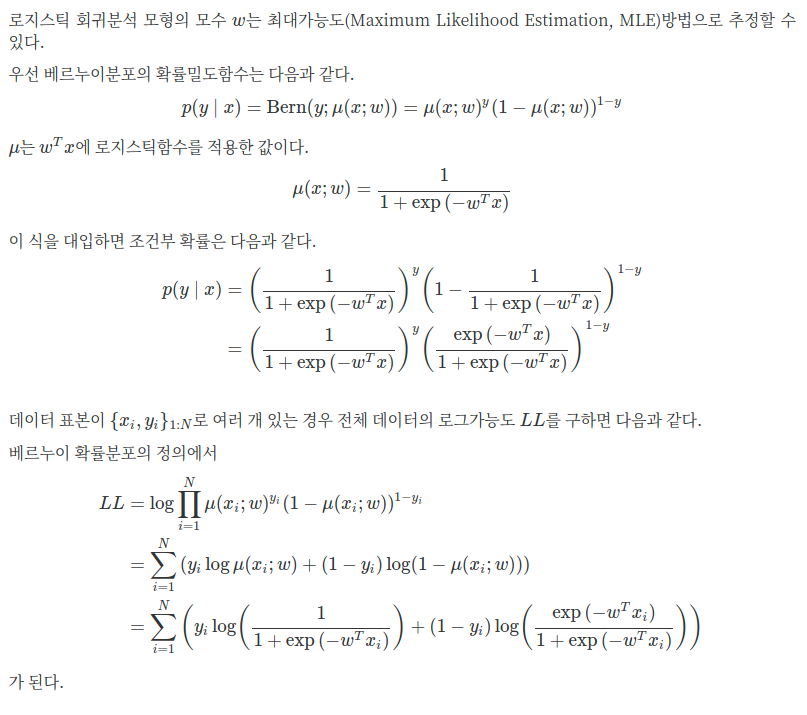

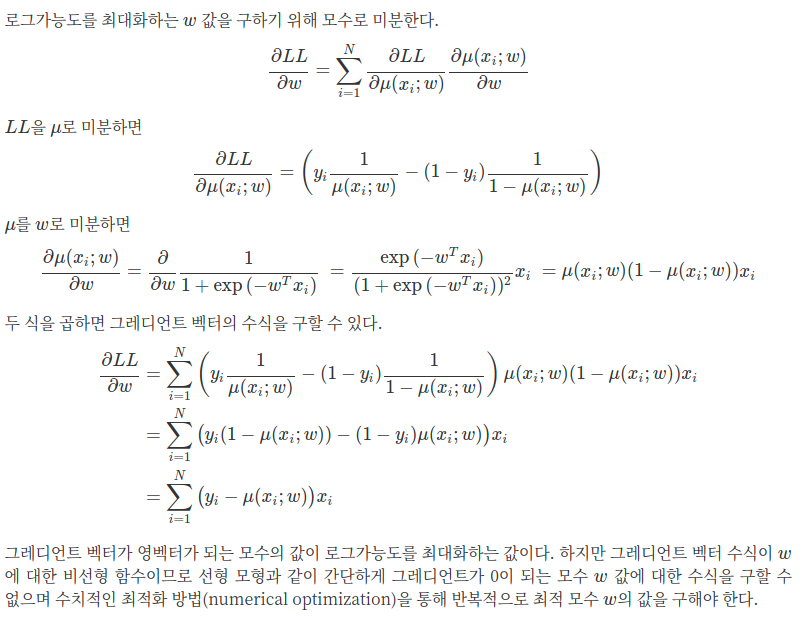

## 수치적 최적화

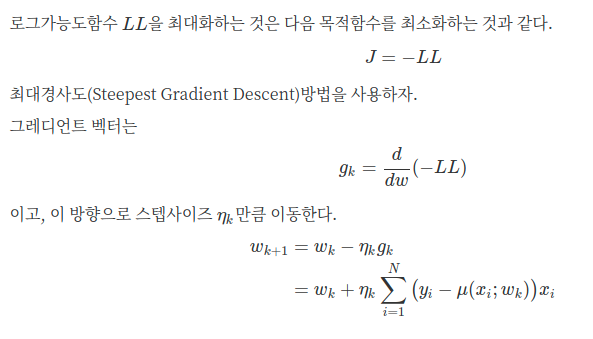

## StatsModels 패지키의 로지슥틱 회귀

In [26]:
from sklearn.datasets import make_classification
import seaborn as sns

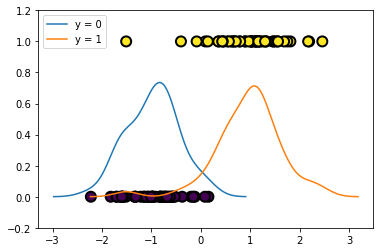

In [27]:
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 Logit 를 제공한다. 사용방법은 OLS 클래스 사용법과 동일하다. 종속변수와 독립변수 데이터를 넣어 모형을 만들고 fit 메서드로 학습을 시킨다. fit 메서드의 disp=0 인수는 최적화 과정에서 문자열 메세지를 나타내지 않는 역할을 한다.

In [29]:
import statsmodels.api as sm

In [30]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.7679
Time:                        14:46:49   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


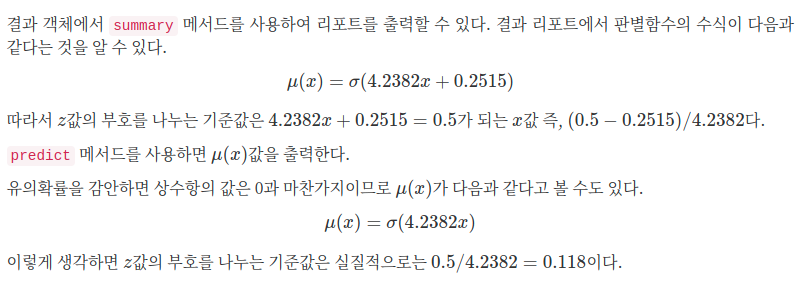

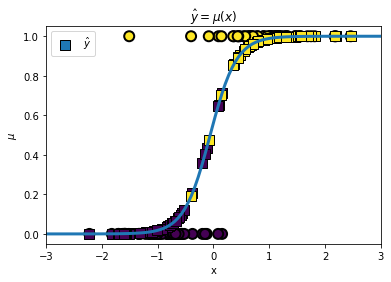

In [31]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

## 판별함수

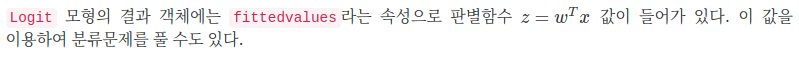

/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_

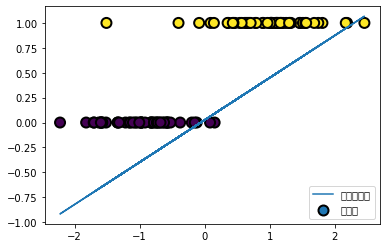

In [32]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

## 로지스틱 회귀 성능 측정

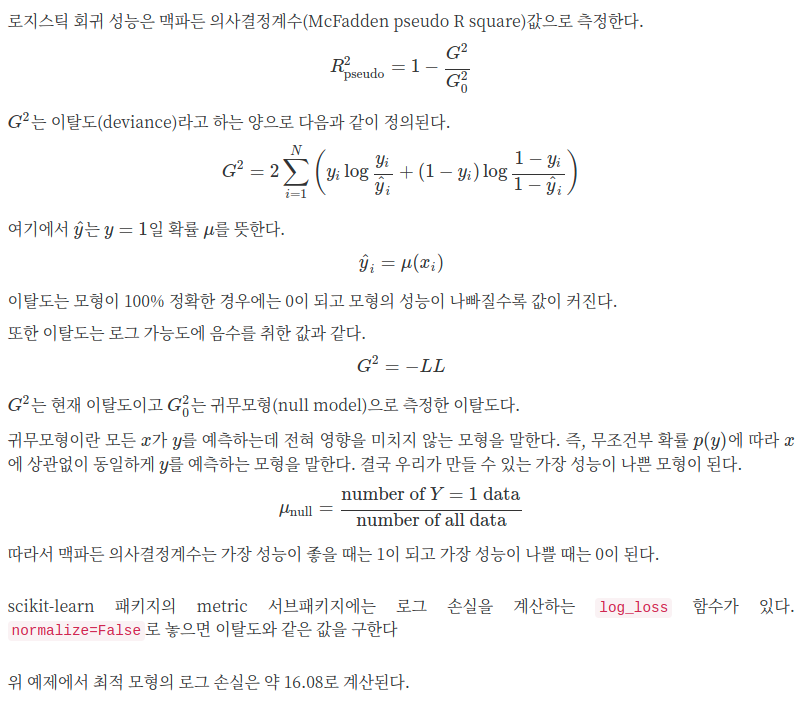

In [33]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

귀무 모형의 모수값을 구하면 0.51이고 이 값으로 로그 손실을 계산하면 약 69이다.

In [34]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [35]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

두 값을 이용하여 맥파든 의사 결정계수 값을 계산할 수 있다.

In [36]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

## Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 LogisticRegression 를 제공한다.

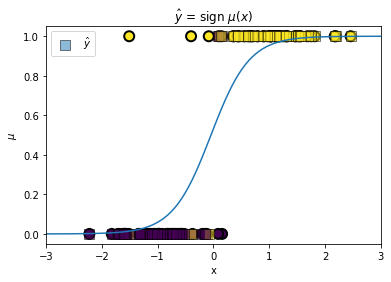

In [37]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

## 로지스틱 회귀를 사용한 이진 분류의 예

다음 데이터는 미국 의대생의 입학관련 데이터이다. 데이터의 의미는 다음과 같다.

- Acceptance: 0이면 불합격, 1이면 합격
- BCPM: Bio/Chem/Physics/Math 과목의 학점 평균
- GPA: 전체과목 학점 평균
- VR: MCAT Verbal reasoning 과목 점수
- PS: MCAT Physical sciences 과목 점수
- WS: MCAT Writing sample 과목 점수
- BS: MCAT Biological sciences 과목 점수
- MCAT: MCAT 촘점
- Apps: 의대 지원 횟수

In [39]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


성적과 합격 여부의 관계

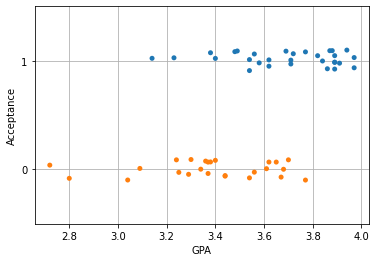

In [40]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

로지스틱 회귀분석을 실시한다. MCAT = VR + PS + WS + BS이므로 이 MCAT은 독립 변수에서 제외해야 한다.

In [41]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.5913
Time:                        14:53:30   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

예측 결과와 실제 결과를 비교하면 다음과 같다.

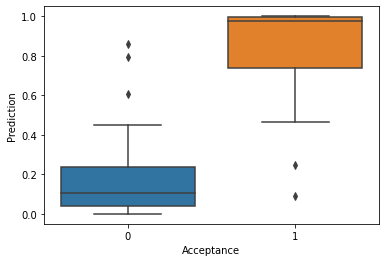

In [42]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

위 분석 결과를 토대로 유의하지 않은 변수들을 제외하고 PS와 BS 점수만을 이용하여 다시 회귀분석하면 다음과 같다.

In [43]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.3315
Time:                        14:54:49   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

위 결과를 바탕으로 다음 점수가  15.5427+0.5 보다 크면 합격이라고 예측할 수 있다.

0.4798PS+1.1464BS

## 로지스틱 회귀를 사용한 회귀분석

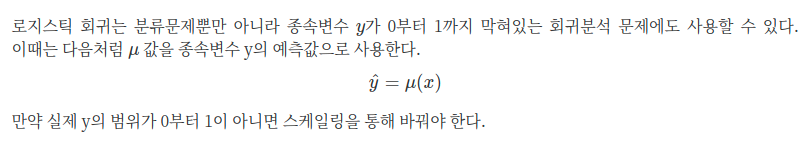

다음 데이터는 1974년도에 "여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다."라는 주장에 대한 찬성, 반대 입장을 조사한 결과이다. 각 열은 다음을 뜻한다.

- education: 교육 기간
- sex: 성별
- agree: 찬성 인원
- disagree: 반대 인원
- ratio: 찬성 비율

In [46]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


교육을 많이 받은 사람일수록 찬성 비율이 감소하는 것을 볼 수 있다.

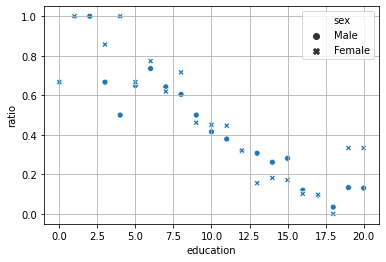

In [48]:
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

In [49]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.3435
Time:                        17:17:02   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

성별은 유의하지 않다는 것을 알게되었으므로 성별을 제외하고 다시 모형을 구한다

In [50]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.3422
Time:                        17:18:59   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

In [52]:
import pandas as pd

/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/newdrone18/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


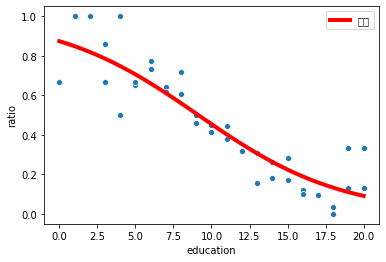

In [53]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="예측")
plt.legend()
plt.show()